# DATA MINING PROJECT

# Principal Components Analysis

## Problem Statement - The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study.

In [23]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Importing data

In [3]:
#Read the data
df = pd.read_csv("Hair Salon.csv")

In [4]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

### We need to check the dimentinality of the data. Correlation Matrix is the best way to obtain it.

In [11]:
#Multivariate Analysis
corr = df_num.corr(method='pearson')

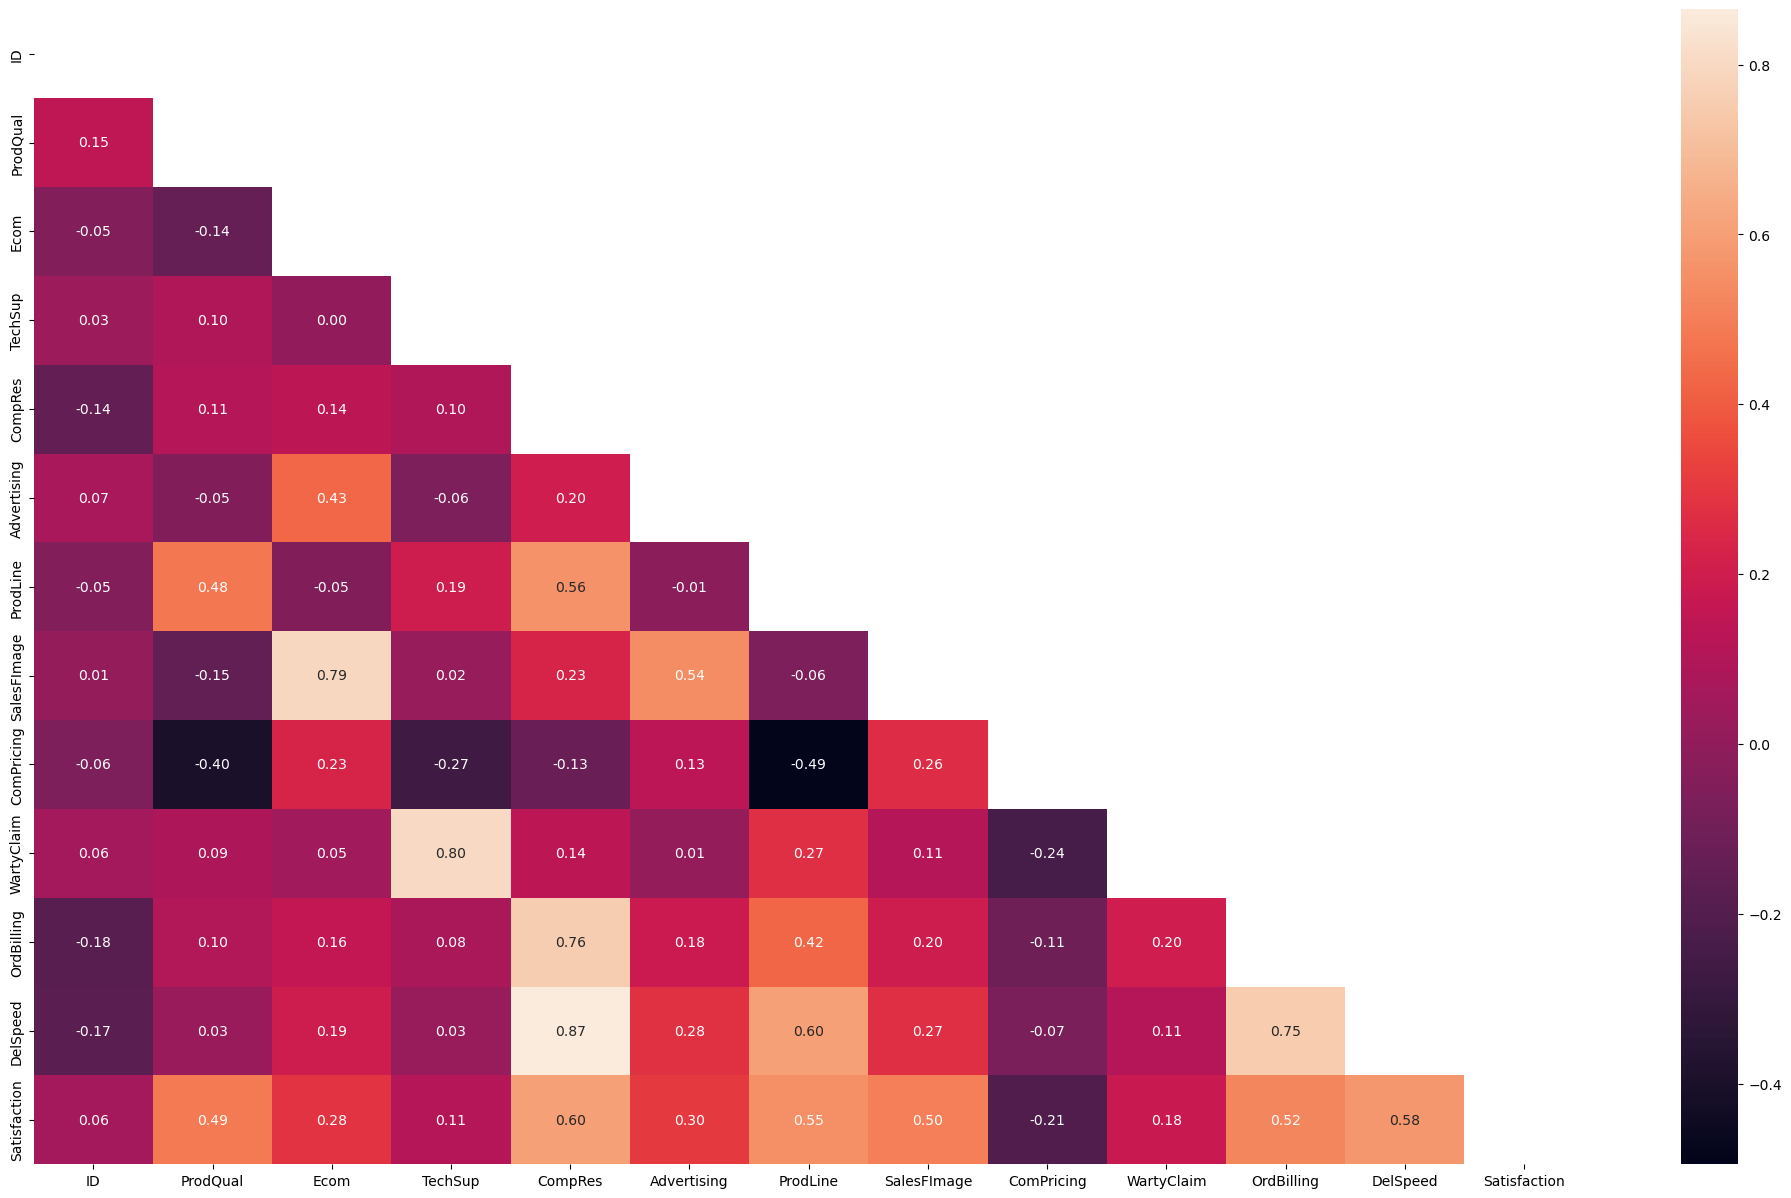

In [12]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### In above matrix, We can see couple of variables are in good corelation with each other. Hence we can conclude that our data is high dimentional. We need to perform PCA to reduce the dimentionality of data.

## Data standardization

### Over here, we need to drop the columns ‘ID’ and ‘Satisfaction’, because ID is a continuous variable and Satisfaction is a dependent variable. PCA doesn’t require continuous or dependent variables.

In [14]:
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['ID','Satisfaction'], axis = 1)

In [15]:
df_pca.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5


In [16]:
#Check the number of features
len(df_pca.columns)

11

### First we need to check for outliers and treat them accordigly. Extreme values affect the variance of fields consequently affecting PCA.

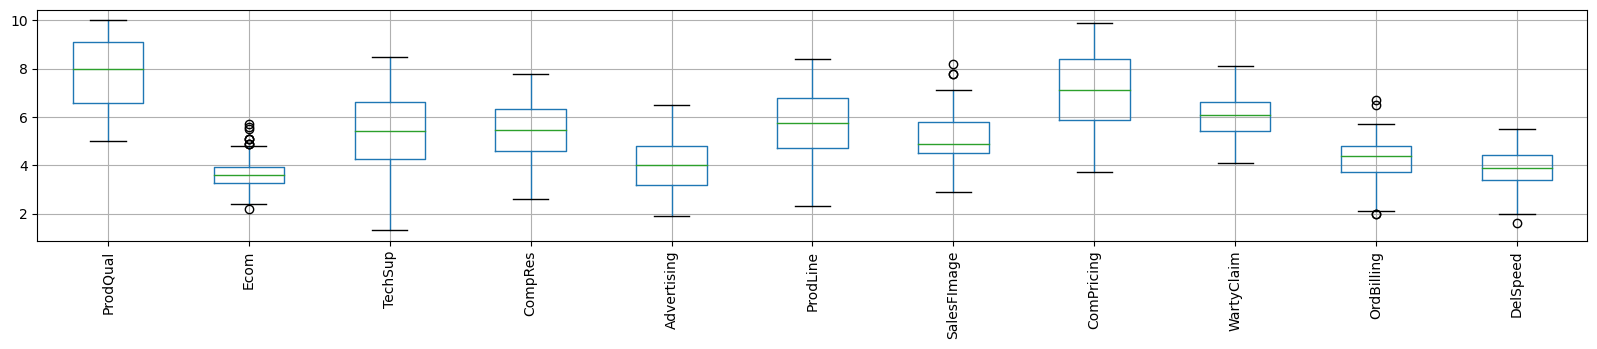

In [17]:
df_pca.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [21]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [29]:
feature_list = ['Ecom', 'SalesFImage', 'OrdBilling']

In [30]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

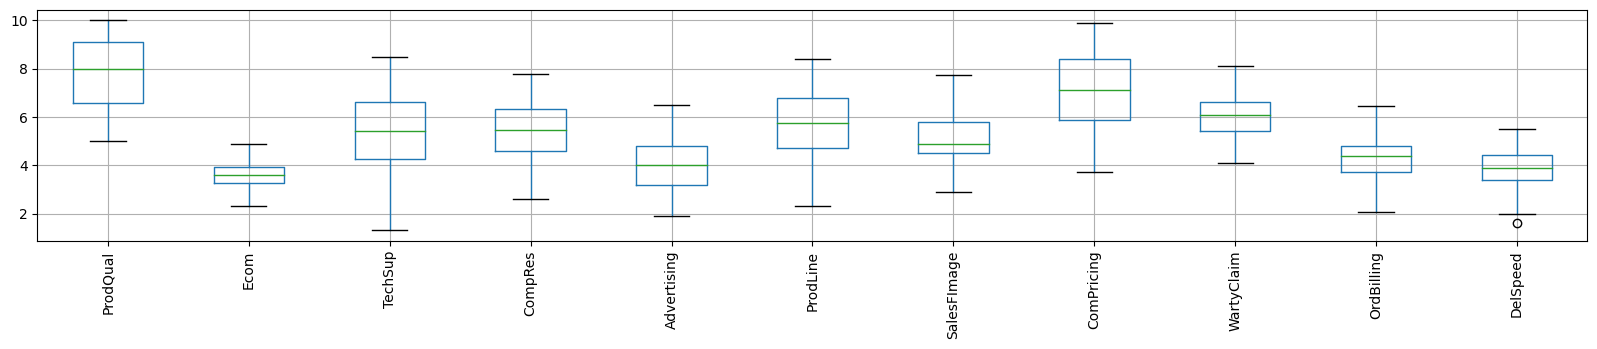

In [31]:
df_pca.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Data Scaling: Scaling data in PCA achieves key goals: ensuring fair variable contribution, preventing scale-related bias, improving interpretability, maintaining numerical stability, treating variables consistently, aiding convergence, and facilitating covariance matrix calculations. This enhances the robustness, accuracy, and meaningful interpretation of PCA results.

### Over here, We will use z-score mothod to scale data.

In [32]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [33]:
df_pca_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.254531
1,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.387605
2,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.840226
3,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.212443
4,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.528220


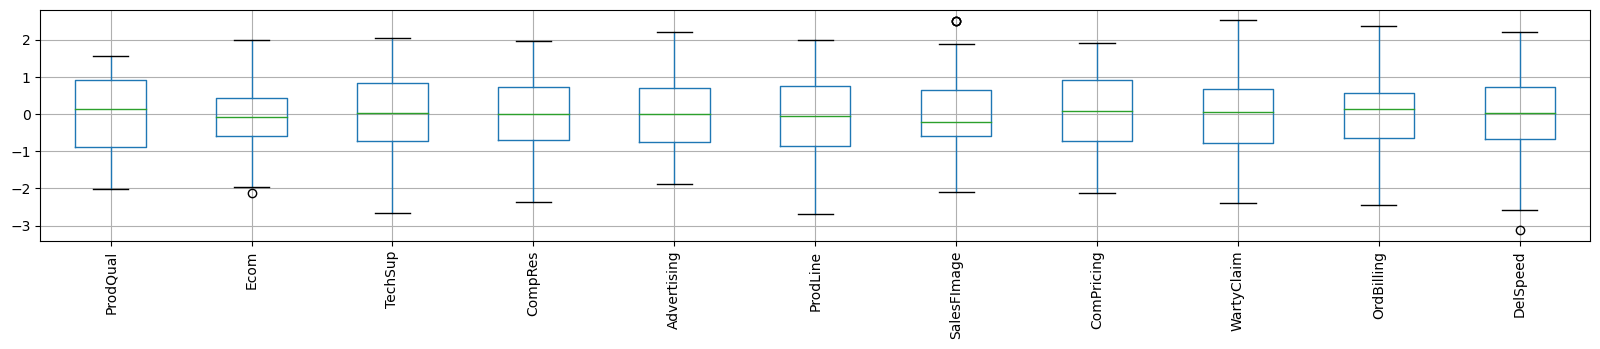

In [34]:
df_pca_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Hypothesis testing for corelation using Bartlett's test.

In [42]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [39]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

5.933824191017049e-96

### Over here p-value is smaller than 0.05. Hence we reject the H0 i.e. There are significant correlations present.

In [40]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.6535145641897558

### Over here value is greater the 0.5. Heance we conclude that we have adequate sample size.

In [44]:
#Correlation matrix post scaling
corrM = df_pca_scaled.corr()
 
corrM

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.027718
Ecom,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168889
TechSup,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.025441
CompRes,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.865092
Advertising,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.275863
ProdLine,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.601850
SalesFImage,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.268724
ComPricing,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.072872
WartyClaim,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.109395
OrdBilling,0.102495,0.146505,0.085443,0.757995,0.188005,0.423870,0.194695,-0.113318,0.198106,1.000000,0.753027


### Compute Covariance Matrix

In [45]:
#Co variance matrix post scaling
df_pca_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,-0.163220,0.096566,0.107444,-0.054013,0.482317,-0.147978,-0.405335,0.089204,0.103531,0.027998
Ecom,-0.163220,1.010101,-0.018976,0.110490,0.429417,-0.097316,0.787115,0.270772,0.027657,0.147985,0.170595
TechSup,0.096566,-0.018976,1.010101,0.097633,-0.063505,0.194571,0.009936,-0.273522,0.805220,0.086307,0.025698
CompRes,0.107444,0.110490,0.097633,1.010101,0.198906,0.567088,0.228937,-0.129247,0.141827,0.765652,0.873830
Advertising,-0.054013,0.429417,-0.063505,0.198906,1.010101,-0.011667,0.548407,0.135573,0.010901,0.189904,0.278650
ProdLine,0.482317,-0.097316,0.194571,0.567088,-0.011667,1.010101,-0.063216,-0.499948,0.275836,0.428152,0.607930
SalesFImage,-0.147978,0.787115,0.009936,0.228937,0.548407,-0.063216,1.010101,0.273986,0.101972,0.196662,0.271438
ComPricing,-0.405335,0.270772,-0.273522,-0.129247,0.135573,-0.499948,0.273986,1.010101,-0.247461,-0.114463,-0.073608
WartyClaim,0.089204,0.027657,0.805220,0.141827,0.010901,0.275836,0.101972,-0.247461,1.010101,0.200107,0.110500
OrdBilling,0.103531,0.147985,0.086307,0.765652,0.189904,0.428152,0.196662,-0.114463,0.200107,1.010101,0.760634


### Now we will proceed with applying PCA to the dataset.

In [46]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

### Next, We need to check and sort Eigen Vectors and Eigen Values.

In [47]:
#Extract eigen vectors
pca.components_

array([[-0.13958484, -0.13254139, -0.16086145, -0.47327735, -0.17663118,
        -0.39334743, -0.18912674,  0.15852645, -0.21491158, -0.44095193,
        -0.4750106 ],
       [-0.30585635,  0.4614841 , -0.22604479,  0.0328043 ,  0.36431125,
        -0.27223013,  0.47202112,  0.40940608, -0.18588346,  0.0436659 ,
         0.08719729],
       [ 0.0673037 , -0.22905446, -0.6160254 ,  0.20400594, -0.09067371,
         0.11717887, -0.23847429,  0.04630508, -0.60480947,  0.15602618,
         0.22537332],
       [ 0.65021058,  0.25606484, -0.18131803, -0.20637509,  0.33161021,
         0.2021036 ,  0.23494751, -0.32910626, -0.17107065, -0.23258698,
        -0.19622886],
       [ 0.29061148,  0.40491279, -0.00969125,  0.02744322, -0.78139983,
         0.11111323,  0.19272181,  0.29469893, -0.01843148,  0.04615378,
        -0.0367786 ],
       [ 0.52948142, -0.30460958,  0.1080686 ,  0.03206965,  0.2591613 ,
        -0.10879264, -0.12876556,  0.69790323,  0.13815614,  0.10867892,
        -0.024

In [48]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.44103192, 2.61222864, 1.69750889, 1.08989931, 0.61732406,
       0.54962197, 0.405415  , 0.24924044, 0.21547516, 0.13372331,
       0.09964241])

In [49]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.30969287, 0.23510058, 0.1527758 , 0.09809094, 0.05555917,
       0.04946598, 0.03648735, 0.02243164, 0.01939276, 0.0120351 ,
       0.00896782])

### Obtain all PCA in Dataframe

In [50]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11'],
                                    index = df_pca_scaled.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
ProdQual,-0.139585,-0.305856,0.067304,0.650211,0.290611,0.529481,0.196319,0.130478,0.007112,0.077462,0.182324
Ecom,-0.132541,0.461484,-0.229054,0.256065,0.404913,-0.304610,0.073107,-0.188332,-0.522538,0.281459,0.040119
TechSup,-0.160861,-0.226045,-0.616025,-0.181318,-0.009691,0.108069,-0.005645,0.421617,-0.412292,-0.386446,-0.042100
CompRes,-0.473277,0.032804,0.204006,-0.206375,0.027443,0.032070,-0.007365,0.517539,0.030580,0.530429,-0.372494
Advertising,-0.176631,0.364311,-0.090674,0.331610,-0.781400,0.259161,-0.047436,-0.076454,-0.155242,0.033360,-0.082662
ProdLine,-0.393347,-0.272230,0.117179,0.202104,0.111113,-0.108793,-0.609382,-0.338458,-0.065612,-0.240849,-0.379732
SalesFImage,-0.189127,0.472021,-0.238474,0.234948,0.192722,-0.128766,-0.032956,0.255550,0.621467,-0.345411,-0.060930
ComPricing,0.158526,0.409406,0.046305,-0.329106,0.294699,0.697903,-0.302459,-0.107563,-0.079324,-0.054171,-0.102987
WartyClaim,-0.214912,-0.185883,-0.604809,-0.171071,-0.018431,0.138156,-0.038937,-0.407360,0.362999,0.437610,0.118509
OrdBilling,-0.440952,0.043666,0.156026,-0.232587,0.046154,0.108679,0.660054,-0.368570,-0.021561,-0.320213,-0.191717


### Next, We need to find out 'Key Components'. 'Scree Plot' Helps us to identify number of key components that are considered important in explaining variance in data.

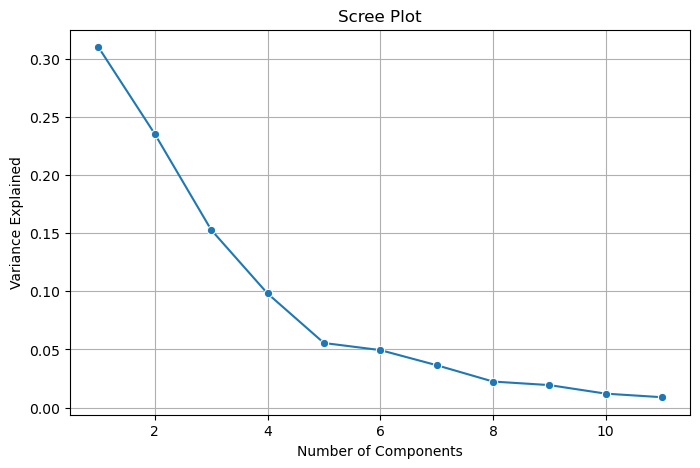

In [51]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,12),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

### In above figure we can evedentely see that Eigenvalues start leveling off at five components. Hence, We can say that first 5 components majorly explains the variance of data.

In [52]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.30969287, 0.54479345, 0.69756925, 0.79566019, 0.85121935,
       0.90068533, 0.93717268, 0.95960432, 0.97899708, 0.99103218,
       1.        ])

In [53]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [54]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.139585,-0.305856,0.067304,0.650211,0.290611
Ecom,-0.132541,0.461484,-0.229054,0.256065,0.404913
TechSup,-0.160861,-0.226045,-0.616025,-0.181318,-0.009691
CompRes,-0.473277,0.032804,0.204006,-0.206375,0.027443
Advertising,-0.176631,0.364311,-0.090674,0.331610,-0.781400
ProdLine,-0.393347,-0.272230,0.117179,0.202104,0.111113
SalesFImage,-0.189127,0.472021,-0.238474,0.234948,0.192722
ComPricing,0.158526,0.409406,0.046305,-0.329106,0.294699
WartyClaim,-0.214912,-0.185883,-0.604809,-0.171071,-0.018431
OrdBilling,-0.440952,0.043666,0.156026,-0.232587,0.046154


In [55]:
df_pca_scaled.iloc[0]

ProdQual       0.496660
Ecom           0.401668
TechSup       -1.881421
CompRes        0.380922
Advertising    0.704543
ProdLine      -0.691530
SalesFImage    0.838627
ComPricing    -0.113185
WartyClaim    -1.646582
OrdBilling     0.791872
DelSpeed      -0.254531
Name: 0, dtype: float64

### Now lets calculate the scores for each PCA.

In [56]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 5), end = ' ')

0.09642 1.58413 1.89004 1.16391 -0.08718 

In [57]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [58]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,0.096417,1.584133,1.890045,1.163914,-0.087181
1,-1.183243,-2.446892,2.061945,-0.482421,-0.627512
2,-2.233832,-0.657839,0.154171,1.351499,-1.024854
3,1.562067,0.108354,-1.838567,-1.159965,-0.880195
4,0.728267,-1.440298,0.246074,0.050423,1.234139
5,2.897915,0.163704,1.567969,-0.807071,-0.903156
6,5.342482,0.918872,-0.594877,-0.007440,1.249229
7,1.485825,1.050203,0.711175,-0.584383,-1.154317
8,-0.604370,1.411412,0.536312,-1.759578,0.349026
9,-0.382922,2.077475,0.292242,-0.341250,0.138649


### End of PCA

# Cluster Analysis / Clustering

### Problem Statement: The 'State_wise_Health_income.csv' dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

### Let's start with loading data in notebook.

In [81]:
df2 = pd.read_csv("State_wise_Health_income.csv")

In [82]:
df2.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [93]:
data = df2.iloc[:,2:6]

In [94]:
data.describe()

,Health_indices1,Health_indices2,Per_capita_income,GDP
count,296.000000,296.000000,296.000000,296.000000
mean,2629.195946,693.594595,2159.597973,174717.050676
std,2041.890970,469.738035,1493.663013,167439.128587
min,-10.000000,0.000000,500.000000,22.000000
25%,640.000000,173.500000,746.000000,8679.500000
50%,2446.500000,810.500000,1869.000000,135748.500000
75%,4102.750000,1076.000000,3138.750000,314751.250000
max,10219.000000,1508.000000,7049.000000,728575.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indices1    296 non-null    int64
 1   Health_indices2    296 non-null    int64
 2   Per_capita_income  296 non-null    int64
 3   GDP                296 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


### Next, Scale the Data.

In [105]:
## Scaling the data using the ZScore Scaling function

from scipy.stats import zscore

#apply the scaler to the data:
data_scaled = data.apply(zscore)
data_scaled.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,-1.085240,-1.338315,-1.070054,-1.034327
1,-0.561310,-0.101493,0.369115,-0.604555
2,-0.968975,-0.841454,-0.707914,-0.881805
3,-1.195619,-1.425745,-1.064018,-1.043738
4,-1.268714,-1.461997,-1.094197,-1.045102


### Hierarchical Clustering

In [106]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

### Here we need to create dendogram for Hierarchical Clustering using 'ward' linkage.

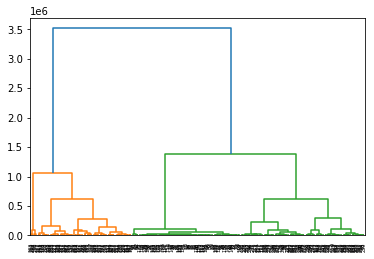

In [107]:
wardlink = linkage(data, method = 'ward')
dend = dendrogram(wardlink)

### Let's look at last ten clusters.

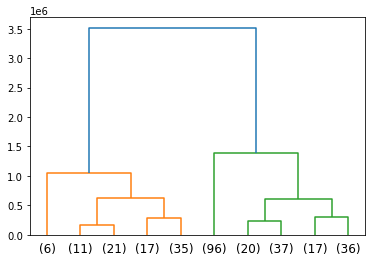

In [108]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

### We will consider last 4 clusters and assign the cluster to each record in table.

In [109]:
from scipy.cluster.hierarchy import fcluster

In [110]:
clusters = fcluster(wardlink, 4, criterion='maxclust')
clusters

array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 2, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 4, 3, 3, 4, 4, 3, 3, 2, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 2, 3, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1,
       2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [136]:
df2['clusters_Hie'] = clusters

In [137]:
df2.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP,clusters_Hie
0,0,Bachevo,417,66,564,1823,3
1,1,Balgarchevo,1485,646,2710,73662,4
2,2,Belasitsa,654,299,1104,27318,3
3,3,Belo_Pole,192,25,573,250,3
4,4,Beslen,43,8,528,22,3


### K-Mean Clustering

In [118]:
from sklearn.cluster import KMeans 

### For K-Mean clustering we need to define number for clusters first. 

In [119]:
k_means = KMeans(n_clusters = 4)

In [120]:
k_means.fit(data_scaled)

KMeans(n_clusters=4)

In [121]:
k_means.labels_

array([3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 0, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 3, 0, 3, 3, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 2, 0, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 0, 3, 0, 0, 3, 3,
       3, 1, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 3, 0, 3, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Elbow Method Analysis

In [123]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

In [124]:
wss

[1184.0,
 467.35180028481136,
 259.2278544455929,
 182.454671740563,
 149.29817615540873,
 116.85259378422676,
 90.38643890433258,
 79.54995816791346,
 70.57549372378448,
 63.78421726764109]

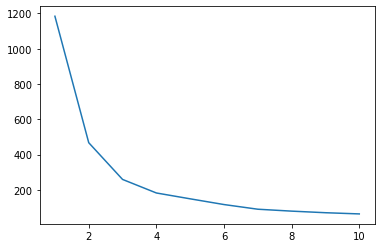

In [125]:
plt.plot(range(1,11), wss)

### We can observe that after 4, curve starts levelling.

In [126]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
labels = k_means.labels_

### Assign cluster labels to the table.

In [138]:
df2["clusters_KMean"] = labels
df2.head(5)

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP,clusters_Hie,clusters_KMean
0,0,Bachevo,417,66,564,1823,3,1
1,1,Balgarchevo,1485,646,2710,73662,4,0
2,2,Belasitsa,654,299,1104,27318,3,1
3,3,Belo_Pole,192,25,573,250,3,1
4,4,Beslen,43,8,528,22,3,1


### Silhouette Score is used to exaluate the quality of clustering. Let's evaluate the K-mean Clustering quality.

In [131]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [132]:
silhouette_score(data_scaled,labels)

0.5519167397833937

### a Silhouette Score of 0.55 is considered good. It indicates a strong separation between clusters and suggests that the clustering is effective in distinguishing between data points in different clusters.

In [133]:
sil_width = silhouette_samples(data_scaled,labels)

### Assign Silhouette Score to table.

In [139]:
df2["sil_width"] = sil_width
df2.head(5)

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP,clusters_Hie,clusters_KMean,sil_width
0,0,Bachevo,417,66,564,1823,3,1,0.875386
1,1,Balgarchevo,1485,646,2710,73662,4,0,0.429125
2,2,Belasitsa,654,299,1104,27318,3,1,0.691122
3,3,Belo_Pole,192,25,573,250,3,1,0.872393
4,4,Beslen,43,8,528,22,3,1,0.858319


### Now, We need to compare two cluster methods. For that we will take the mean per cluster for both methods.

In [145]:
df2.groupby('clusters_KMean').apply(np.mean).T

clusters_KMean,0,1,2,3
Unnamed: 0,191.181818,78.372549,175.250000,176.779661
Health_indices1,2596.232323,517.460784,5146.444444,4799.355932
Health_indices2,787.131313,119.666667,1327.138889,1142.288136
Per_capita_income,2488.565657,698.205882,5047.083333,2372.220339
GDP,142035.676768,9981.362745,367196.916667,396907.237288
clusters_Hie,4.000000,3.058824,2.166667,1.966102
clusters_KMean,0.000000,1.000000,2.000000,3.000000
sil_width,0.436740,0.796662,0.366529,0.435177


In [146]:
df2.groupby('clusters_Hie').apply(np.mean).T

clusters_Hie,1,2,3,4
Unnamed: 0,187.833333,175.452381,75.114583,187.127273
Health_indices1,6649.333333,4857.559524,414.500000,2641.081818
Health_indices2,1044.000000,1223.023810,105.854167,783.127273
Per_capita_income,2299.833333,3422.583333,686.395833,2473.190909
GDP,687649.666667,372337.154762,5862.468750,143193.009091
clusters_Hie,1.000000,2.000000,3.000000,4.000000
clusters_KMean,3.000000,2.607143,1.000000,0.163636
sil_width,0.306996,0.422938,0.828088,0.422747


### After analysing above tables, We can conclude that there is not much differnce in clustering with both methods.

### End of Clustering